<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_24_feature_scalling_standardization/Lecture_24_feature_scalling_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [51]:
df = df.iloc[:,2:]

In [52]:
df.sample(5)

,Age,EstimatedSalary,Purchased
125,39,61000,0
150,26,15000,0
236,40,57000,0
208,40,142000,1
304,40,60000,0


# **Train test split**

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.2,
                                                 random_state=0)

x_train.shape, x_test.shape

((320, 2), (80, 2))

# **StandardScaler**

In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
x_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [56]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [57]:
x_test_scaled

,Age,EstimatedSalary
0,-0.798951,0.494608
1,-0.021265,-0.577359
2,-0.312897,0.146943
3,-0.798951,0.262831
4,-0.312897,-0.577359
...,...,...
75,-1.965480,0.349747
76,0.367578,0.262831
77,0.173157,-0.287638
78,1.436896,-1.040912


In [58]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [59]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


# **Effect of Scalling**

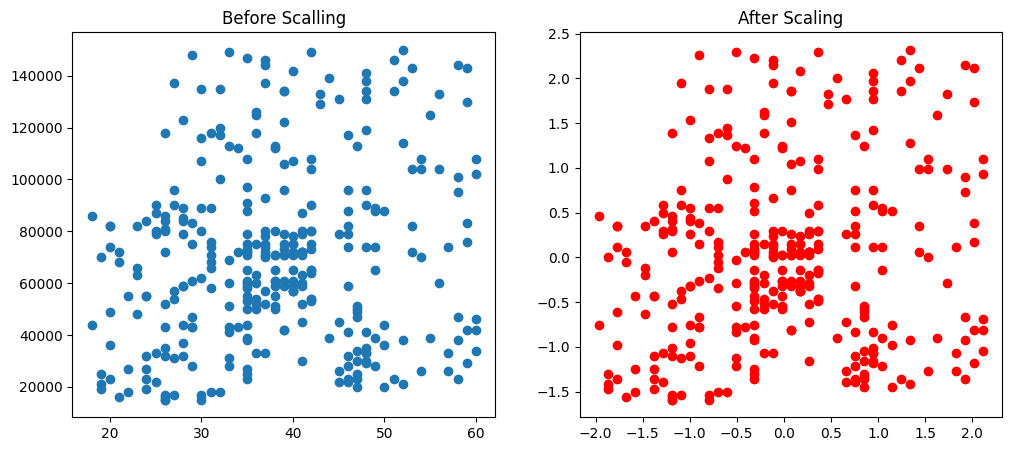

In [60]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])

ax1.set_title('Before Scalling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')

ax2.set_title('After Scaling')

plt.show()

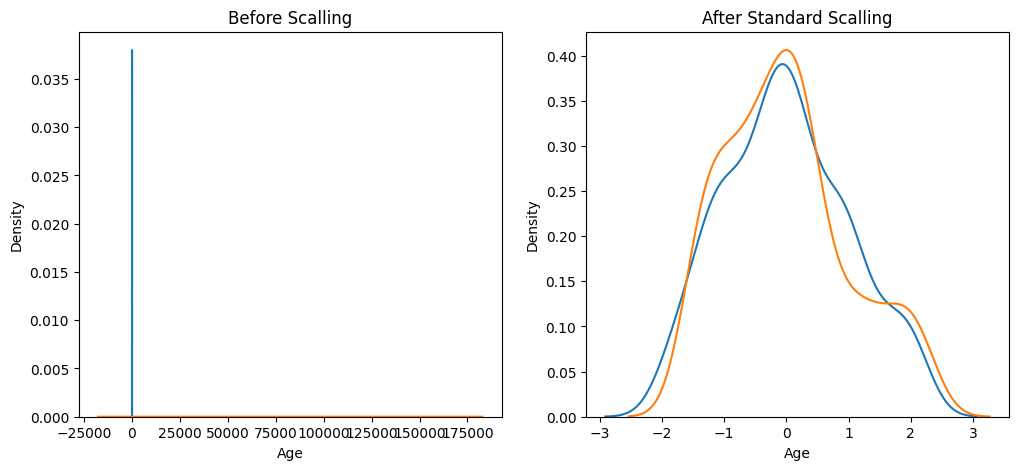

In [61]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize= (12, 5))

# before scaling
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scalling
ax2.set_title('After Standard Scalling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# **Comparision of Distributions**

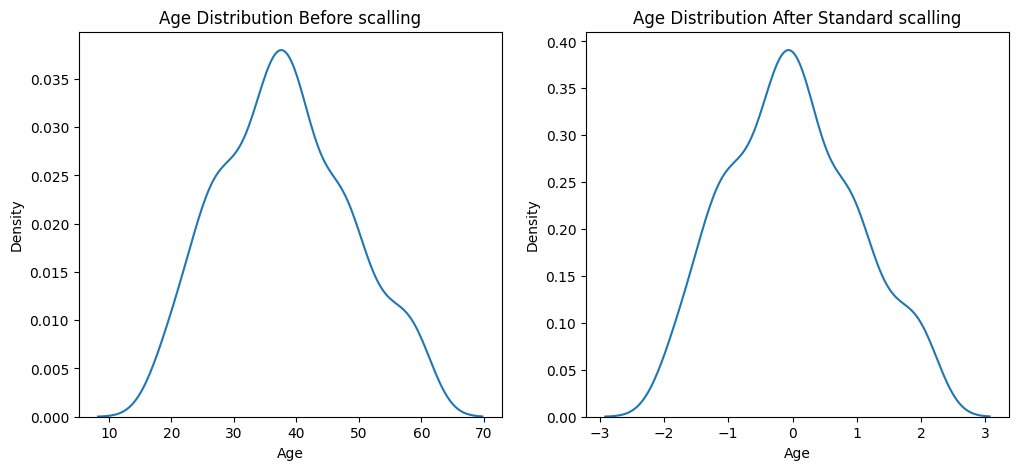

In [62]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize= (12, 5))

# before scalling
ax1.set_title('Age Distribution Before scalling')
sns.kdeplot(x_train['Age'],ax=ax1)

# after scalling
ax2.set_title('Age Distribution After Standard scalling')

sns.kdeplot(x_train_scaled['Age'],ax=ax2)

plt.show()

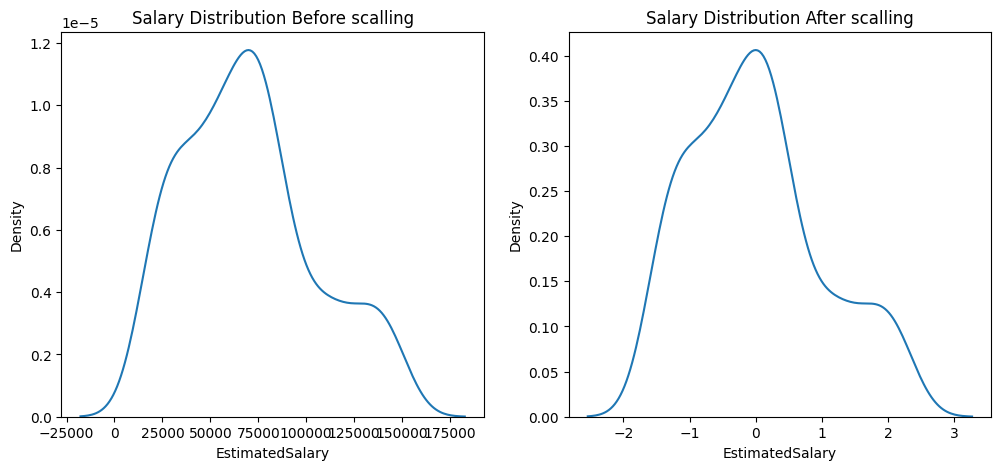

In [63]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize= (12, 5))

# before scalling
ax1.set_title('Salary Distribution Before scalling')

sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# after scalling
ax2.set_title('Salary Distribution After scalling')

sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

shape of distribution would be same in scalling

mean = 0

standard deviation =1


# **Why scalling is important?**


In [64]:
from sklearn.linear_model import LogisticRegression



In [65]:
lr= LogisticRegression()
lr_scaled=LogisticRegression()

In [66]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [67]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [72]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [73]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [74]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.9


In [75]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# **Effect of Outlier**

generating and adding data in dataframe

# **While scaling (like standardization or normalization)**

 can help improve the performance of some machine learning algorithms,

it doesn't inherently reduce the presence of outliers.

Outliers can actually distort the scaling process, making it less effective.
  
Using scaling methods like StandardScaler or MinMaxScaler can be problematic when outliers are present because they are sensitive to extreme values.
   
Robust scaling methods, like RobustScaler, are designed to be more resistant to outliers by using median and IQR, according to Proclus Academy.

In [77]:
# df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)



In [78]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})]
                           ,ignore_index=True)

In [82]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


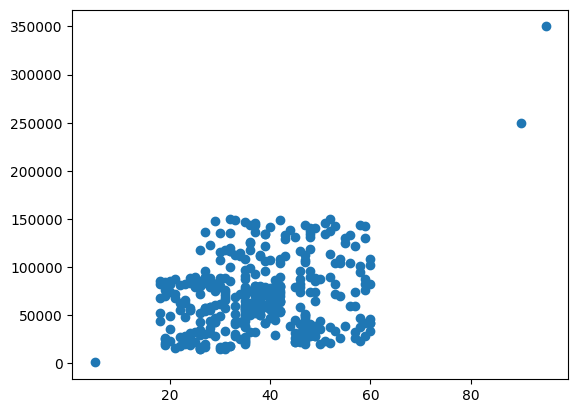

In [83]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
x_train.shape, x_test.shape

((282, 2), (121, 2))

In [85]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [86]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

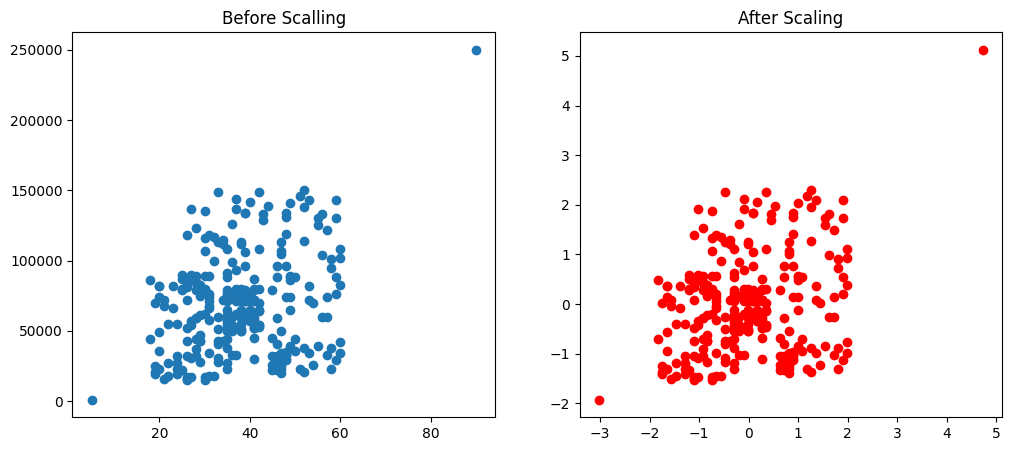

In [87]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scalling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()